<a href="https://colab.research.google.com/github/Nidhi-S-Vas/Assignment-case_studies/blob/main/Assignment__on_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [378]:
Data=pd.read_csv("/content/diabetes (2).csv")
Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Data Preprocessing

In [379]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [380]:
Data.shape

(768, 9)

In [381]:
Data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [382]:
#checking for duplicates
Data.duplicated().sum()

np.int64(0)

In [383]:
#missing value checking
# Replace 0 with NaN for all columns except 'outcome'
for col in Data.columns:
    if col != "Outcome":
        Data[col] = Data[col].replace(0, np.nan)

# Check missing values
print(round(Data.isnull().mean()*100,2))


Pregnancies                 14.45
Glucose                      0.65
BloodPressure                4.56
SkinThickness               29.56
Insulin                     48.70
BMI                          1.43
DiabetesPedigreeFunction     0.00
Age                          0.00
Outcome                      0.00
dtype: float64


In [384]:
#Removing missing value using simple imputer
from sklearn.impute import SimpleImputer

# Create imputer
imputer = SimpleImputer(strategy="median")

for col in Data.columns:
    # Only apply to numeric columns, except 'outcome'
    if Data[col].dtype in ['float64', 'int64'] and col != "outcome":
        Data[col] = imputer.fit_transform(Data[[col]])

print("Dataset after replacing missing values")
Data.head()


Dataset after replacing missing values


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [385]:
round(Data.isnull().mean()*100,2)

,0
Pregnancies,0.0
Glucose,0.0
BloodPressure,0.0
SkinThickness,0.0
Insulin,0.0
BMI,0.0
DiabetesPedigreeFunction,0.0
Age,0.0
Outcome,0.0


In [386]:
#Checking the skewness
Data.select_dtypes("number").skew()

,0
Pregnancies,1.023716
Glucose,0.535587
BloodPressure,0.141885
SkinThickness,0.837608
Insulin,3.380019
BMI,0.599233
DiabetesPedigreeFunction,1.919911
Age,1.129597
Outcome,0.635017


<Axes: >

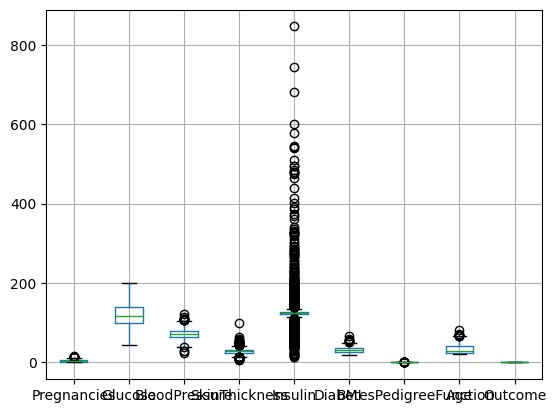

In [387]:
Data.boxplot()

In [388]:
#Removing the outliers or skewness of the necessary columns
import numpy as np

# Insulin → Log
Data['Insulin'] = np.log1p(Data['Insulin'])
# Age → Cube root
Data['Age'] = np.cbrt(Data['Age'])

Data.select_dtypes("number").skew()


,0
Pregnancies,1.023716
Glucose,0.535587
BloodPressure,0.141885
SkinThickness,0.837608
Insulin,-0.175078
BMI,0.599233
DiabetesPedigreeFunction,1.919911
Age,0.764433
Outcome,0.635017


<Axes: >

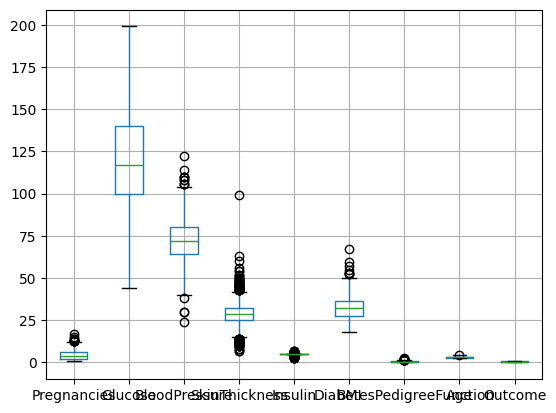

In [389]:
Data.boxplot()

<Axes: >

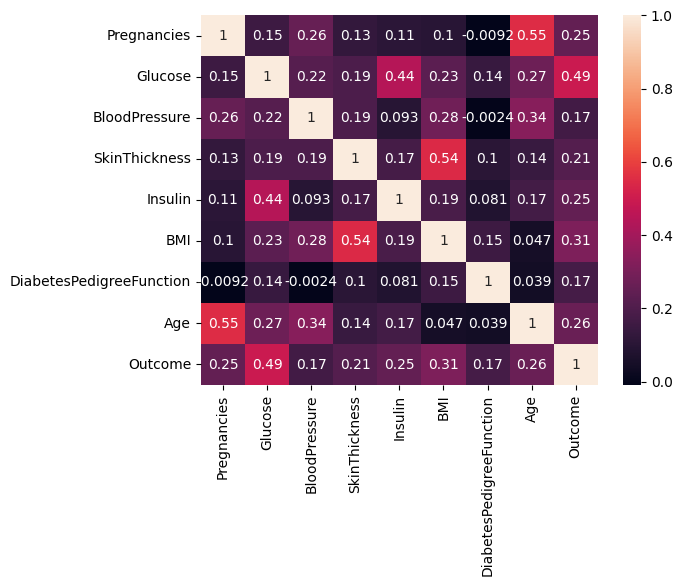

In [390]:
#to understand the correlation drawing heat map
import seaborn as sns
sns.heatmap(Data.select_dtypes("number").corr(),annot=True)

No Encoding need because all in numerical form

#Scaling

In [391]:
# feature engineering selecting the features and the target
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = Data.drop("Outcome", axis=1) #feature selection
y = Data["Outcome"]  # target selection


print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [392]:
#Scaling the features ,target are not scaled
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [393]:
X

array([[ 0.52939452,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.44271886],
       [-1.14928009, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.09712234],
       [ 1.20086436,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.00228469],
       ...,
       [ 0.1936596 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.19402207],
       [-1.14928009,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.22931386],
       [-1.14928009, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.94135544]])

In [394]:
# splitting the data to test and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [395]:
# Calculate Class Imbalance Ratio
max_cls = Data['Outcome'].value_counts().max()
min_cls = Data['Outcome'].value_counts().min()
ratio = max_cls / min_cls

print(f"Class Imbalance Ratio: {ratio:.2f}")

Class Imbalance Ratio: 1.87


Slight imbalance

Apply different model both classification and Ensemble model

In [396]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

def evaluate_models(models, X_train, y_train, X_test, y_test, results):
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        report = classification_report(y_test, y_test_pred, output_dict=True)

        results.append({
            "Model": name,
            "Train Accuracy": round(accuracy_score(y_train, y_train_pred), 4),
            "Test Accuracy": round(accuracy_score(y_test, y_test_pred), 4),
            "Precision (macro avg)": round(report["macro avg"]["precision"], 4),
            "Recall (macro avg)": round(report["macro avg"]["recall"], 4),
            "F1-Score (macro avg)": round(report["macro avg"]["f1-score"], 4),
        })
    return results

# Base models
base_models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVC": SVC()
}

# Ensemble models
ensemble_models = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')
}

results = []
results = evaluate_models(base_models, X_train, y_train, X_test, y_test, results)
results = evaluate_models(ensemble_models, X_train, y_train, X_test, y_test, results)

# Final results table
results_df = pd.DataFrame(results)
print(results_df)



                 Model  Train Accuracy  Test Accuracy  Precision (macro avg)  \
0  Logistic Regression          0.7736         0.7532                 0.7312   
1          Naive Bayes          0.7459         0.7078                 0.6853   
2        Decision Tree          1.0000         0.7013                 0.6859   
3  K-Nearest Neighbors          0.8160         0.6883                 0.6639   
4                  SVC          0.8257         0.7403                 0.7170   
5        Random Forest          1.0000         0.7857                 0.7667   
6             AdaBoost          0.8046         0.7532                 0.7326   
7    Gradient Boosting          0.9316         0.7532                 0.7326   
8              XGBoost          1.0000         0.6883                 0.6621   

   Recall (macro avg)  F1-Score (macro avg)  
0              0.7273                0.7291  
1              0.6919                0.6878  
2              0.6990                0.6878  
3              

Logistic Regression is the best model among all the model beacuse the train accuray and test accuray are almost the same even though the random forest has the highest Test accuracy and F1 score it is overfitted because the train accuracy is 1 but test accuracy is just 0.785 and also XGBoost also highly overfitted

**Logistic Regression is the better model**